In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head().T

,0,1,2,3,4
File Number,2009-00002,2009-00003,2009-00004,2009-00005,2009-00006
Date of Report,01/01/2009 12:39:00 AM,01/01/2009 01:34:00 AM,01/01/2009 01:43:00 AM,01/01/2009 02:27:00 AM,01/01/2009 02:34:00 AM
Crime Date Time,1/1/09 0:39,1/1/09 1:34,01/01/2009 02:20 - 02:35,01/01/2009 02:20 - 02:45,01/01/2009 02:15 - 02:35
Crime,Simple Assault,Simple Assault,Aggravated Assault,Simple Assault,Disorderly
Reporting Area,504.0,610.0,708.0,105.0,708.0
Neighborhood,Cambridgeport,Mid-Cambridge,Riverside,East Cambridge,Riverside
Location,"400 Massachusetts Avenue, Cambridge, MA","200 HAMPSHIRE STREET, Cambridge, MA","DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...","100 SCIARAPPA STREET, Cambridge, MA","1200 Massachusetts Avenue, Cambridge, MA"


In [6]:
df.isna().sum()

File Number         0
Date of Report      0
Crime Date Time     0
Crime               0
Reporting Area      2
Neighborhood        2
Location           83
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
X = df[['Crime', 'Neighborhood']]

In [9]:
X_enc = pd.get_dummies(X,)


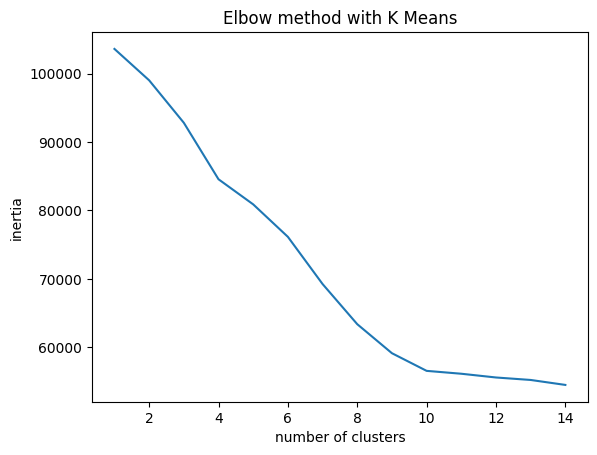

In [13]:
from sklearn.cluster import KMeans

k_range = range(1,15)

inertias = []
for k in k_range:
    model = KMeans(n_clusters=k, random_state=15)
    model.fit(X_enc)
    inertias.append(model.inertia_)

plt.plot(k_range, inertias)
plt.title('Elbow method with K Means')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

plt.show()


From the elbow method, it appears that around 10 is a good value for k for number of clusters of this feature set.

In [51]:
from sklearn.metrics import silhouette_score

model_KMeans = KMeans(n_clusters=10)
model_KMeans.fit(X_enc)
label = model_KMeans.labels_



In [63]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder().set_output(transform='pandas')
X_enc2 = enc.fit_transform(X)
X_enc2.set_index

X_plt = pd.concat([X_enc2, pd.DataFrame(label, columns=['label'])], axis = 1)



In [80]:
from sklearn.cluster import AgglomerativeClustering

model_agg = AgglomerativeClustering(n_clusters=10,linkage='ward')
model_agg.fit(X_enc)
label2 = model_agg.labels_

In [81]:
sil_KM = silhouette_score(X_enc, label)
sil_AG = silhouette_score(X_enc, label2)

In [82]:
print("K Means Silhouette Score: ", sil_KM)
print("Agglomerative Silhouette Score: ", sil_AG)

K Means Silhouette Score:  0.2395049619787323
Agglomerative Silhouette Score:  0.29215325588992364


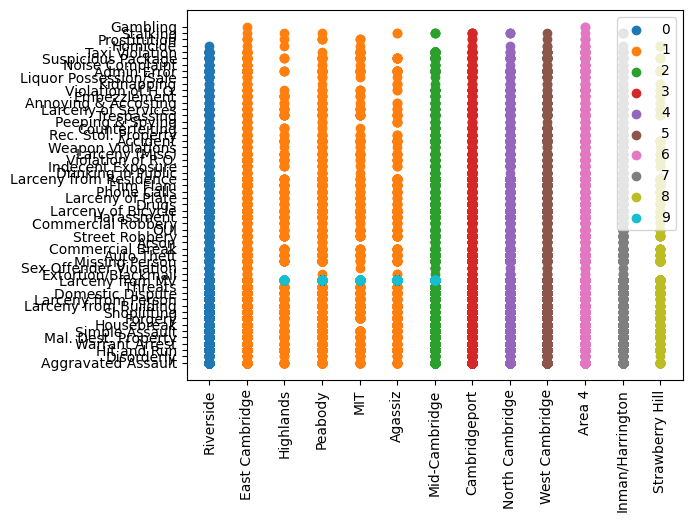

In [ ]:
# A very rough plot of the clusters
 
u_labels = np.unique(label)
 

 
for i in u_labels:
    plt.scatter(X.iloc[label == i , 1], X.iloc[label == i , 0], label = i)
plt.xticks(rotation=90)
plt.yticks()
plt.legend()
plt.show()